# March Madness and Analytics:
## How Strongly Related are the Ratings of the Men's and Women's Teams?

In [1]:
import pandas as pd
import numpy as np

In [176]:
import matplotlib.pyplot as plt
import seaborn as sns

In [109]:
df_mens_ratings = pd.read_csv('Massey_men_d1.csv',usecols=['Team','Rat'],index_col='Team')\
.rename(columns={'Rat':'Rating'})

df_womens_ratings = pd.read_csv('Massey_women_d1.csv',usecols=['Team','Rat'],index_col='Team')\
.rename(columns={'Rat':'Rating'})

In [110]:
df_mens_ratings.sample(5).sort_values('Rating')

,Rating
Team,
USC,13
S Illinois,174
South Alabama,191
UT Arlington,204
F Dickinson,292


In [111]:
df_womens_ratings.sample(5).sort_values('Rating')

,Rating
Team,
Notre Dame,48
Miami FL,59
Wyoming,119
FL Atlantic,171
Jacksonville St,175


In [145]:
df_combined = df_mens_ratings.merge(df_womens_ratings,on='Team',how='outer',suffixes=['_Men','_Women'])

In [146]:
df_mens_ratings.shape[0],df_womens_ratings.shape[0],df_combined.shape[0]

(347, 355, 357)

In [147]:
df_combined[df_combined.Rating_Men.isna() | df_combined.Rating_Women.isna()]

,Rating_Men,Rating_Women
Team,,
VMI,185.0,NaN
Citadel,216.0,NaN
Princeton,NaN,58.0
Penn,NaN,108.0
Yale,NaN,121.0
Harvard,NaN,136.0
Columbia,NaN,144.0
Cornell,NaN,176.0
Dartmouth,NaN,210.0


In [148]:
df_combined.Rating_Women = df_combined.Rating_Women.fillna(356)
df_combined.Rating_Men = df_combined.Rating_Men.fillna(348)

In [149]:
df_combined.isna().any()

Rating_Men      False
Rating_Women    False
dtype: bool

In [168]:
df_combined[['Rating_min','Rating_mean','Rating_max']] = df_combined[['Rating_Men','Rating_Women']].apply(['min','mean','max'],axis=1)

In [173]:
df_combined['Rating_rmse'] = df_combined[['Rating_Men','Rating_Women']].apply(lambda x: np.sqrt(np.mean(x**2)).round(2), axis=1)

In [ ]:
df_combined.sort_values('Rating_rmse',inplace=True)

In [187]:
t = np.linspace(0,1,101)

In [233]:
df_combined.Rating_max.apply(lambda x: int(8*x/356))

Team
Baylor           0
Michigan         0
Arkansas         0
Iowa             0
Ohio St          0
                ..
Charleston So    7
Delaware St      7
MS Valley St     7
Chicago St       7
S Carolina St    7
Name: Rating_max, Length: 357, dtype: int64

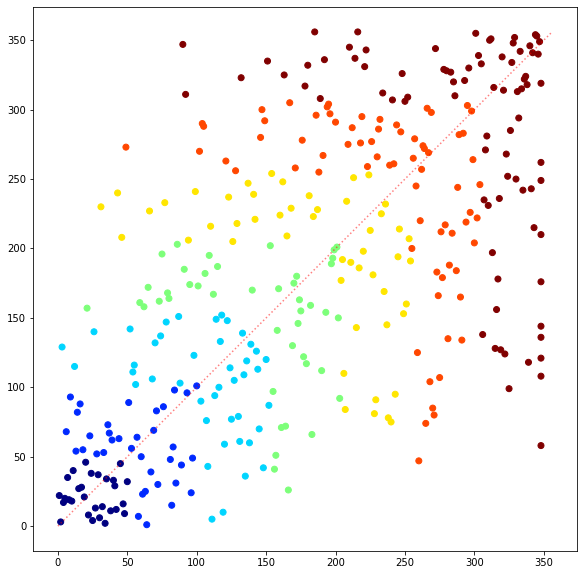

In [244]:
plt.figure(figsize=(10,10))
plt.scatter(df_combined.Rating_Men, df_combined.Rating_Women
            ,c=df_combined.Rating_max.apply(lambda x: int(7*x/356 - 1e-3))
            ,cmap="jet"
               )

plt.plot(356*t, 356*t,':r',alpha=0.5)
plt.axis('square');

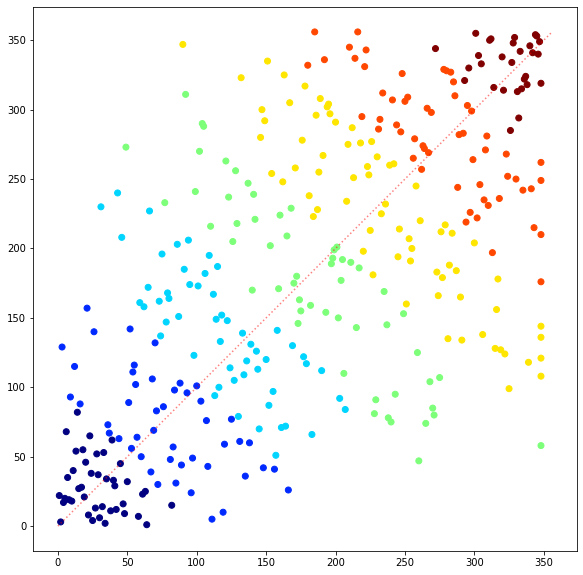

In [245]:
plt.figure(figsize=(10,10))
plt.scatter(df_combined.Rating_Men, df_combined.Rating_Women
            ,c=df_combined.Rating_mean.apply(lambda x: int(7*x/356 - 1e-3))
            ,cmap="jet"
               )

plt.plot(356*t, 356*t,':r',alpha=0.5)
plt.axis('square');

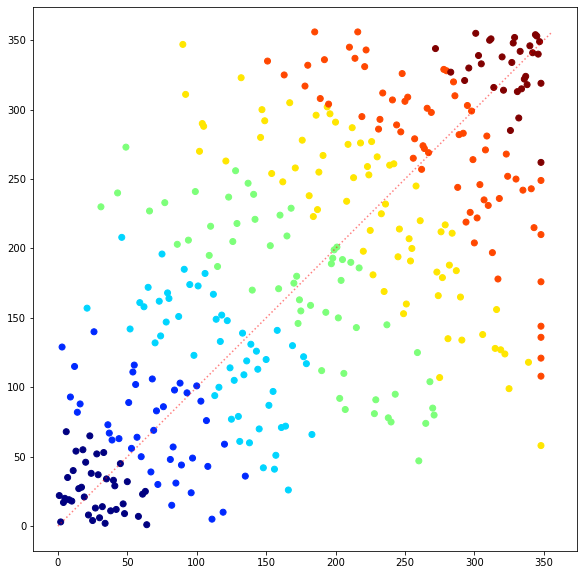

In [246]:
plt.figure(figsize=(10,10))
plt.scatter(df_combined.Rating_Men, df_combined.Rating_Women
            ,c=df_combined.Rating_rmse.apply(lambda x: int(7*x/356 - 1e-3))
            ,cmap="jet"
               )

plt.plot(356*t, 356*t,':r',alpha=0.5)
plt.axis('square');

In [59]:
t = np.linspace(0,1,101)
x = np.cos(t*np.pi/2)
y = np.sin(t*np.pi/2)

In [60]:
tau = df_both[['Rating_Men','Rating_Women']].corr('kendall').values[0][1]

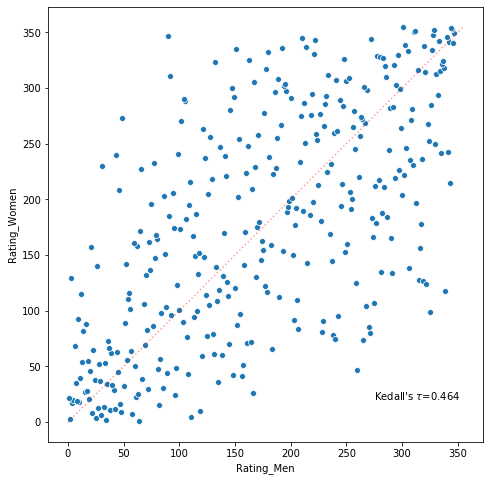

In [80]:
plt.figure(figsize=(8,8))
sns.scatterplot(df_both.Rating_Men,df_both.Rating_Women)
plt.text(275,20,f"Kedall's $\\tau$={tau:.3f}")

plt.plot(355*t, 355*t,':r',alpha=0.4);
plt.axis('square');

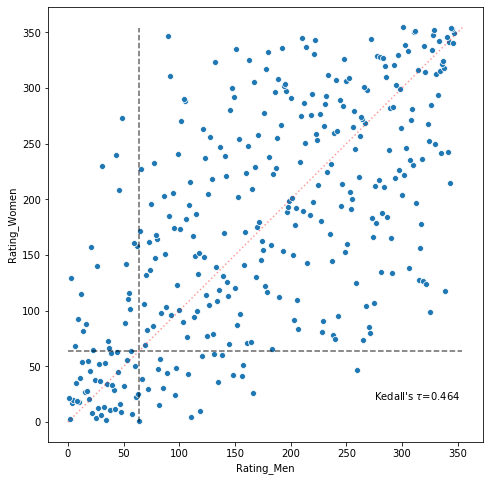

In [83]:
plt.figure(figsize=(8,8))
sns.scatterplot(df_both.Rating_Men,df_both.Rating_Women)
plt.text(275,20,f"Kedall's $\\tau$={tau:.3f}")
plt.plot(354*t, 64*np.ones(t.shape),'--k',alpha=0.6)
plt.plot(64*np.ones(t.shape), 354*t,'--k',alpha=0.6)

plt.plot(355*t, 355*t,':r',alpha=0.4);
plt.axis('square');

In [97]:
df_both['Womens_Tourney'] = (df_both.Rating_Women <=64)
df_both['Mens_Tourney'] = (df_both.Rating_Men <=64)
df_both.pivot_table(columns='Womens_Tourney',index='Mens_Tourney', values='Team',aggfunc='count')

Womens_Tourney,False,True
Mens_Tourney,,
False,260,21
True,22,42


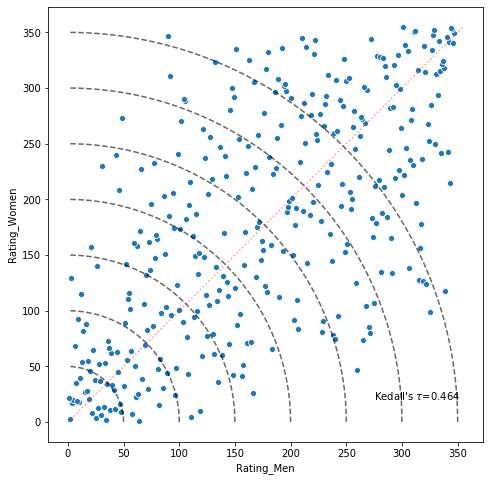

In [66]:
plt.figure(figsize=(8,8))
sns.scatterplot(df_both.Rating_Men,df_both.Rating_Women)
plt.text(275,20,f"Kedall's $\\tau$={tau:.3f}")
for r in range(50,351,50):
    plt.plot(r*x, r*y,'--k',alpha=0.6)

plt.plot(355*t, 355*t,':r',alpha=0.4);
plt.axis('square');

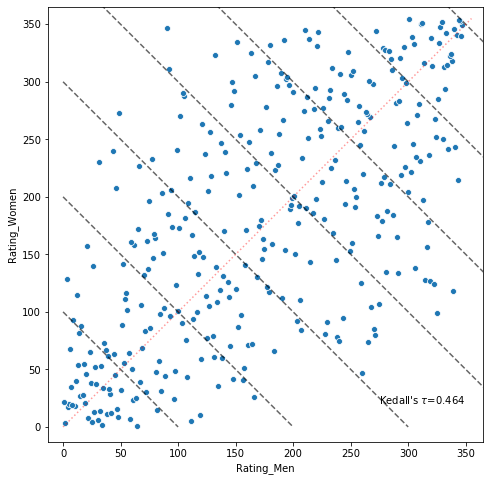

In [73]:
plt.figure(figsize=(8,8))
sns.scatterplot(df_both.Rating_Men,df_both.Rating_Women)
plt.text(275,20,f"Kedall's $\\tau$={tau:.3f}")
for r in range(100,701,100):
    plt.plot(r*t, r*(1 - t),'--k',alpha=0.6)

plt.plot(355*t, 355*t,':r',alpha=0.4);
plt.axis('square');
plt.axis([-13,365,-13,365]);


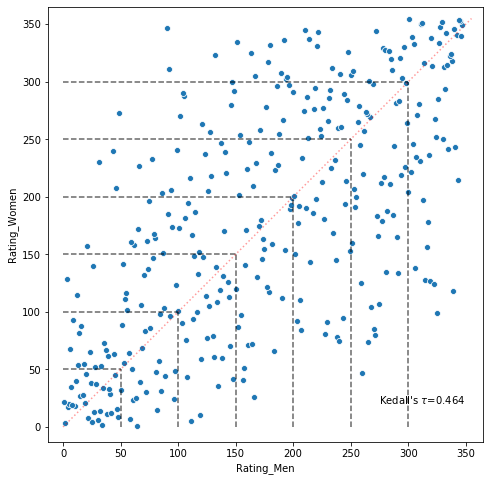

In [78]:
plt.figure(figsize=(8,8))
sns.scatterplot(df_both.Rating_Men,df_both.Rating_Women)
plt.text(275,20,f"Kedall's $\\tau$={tau:.3f}")
for r in range(50,301,50):
    plt.plot(r*t, r*np.ones(t.shape),'--k',alpha=0.6)
    plt.plot(r*np.ones(t.shape), r*t,'--k',alpha=0.6)

plt.plot(355*t, 355*t,':r',alpha=0.4);
plt.axis('square');
plt.axis([-13,365,-13,365]);
